In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Importation des packages nécessaires

In [27]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import time
from tabata.opset import Opset
from Cleaning import *
from Phase import *

Visualisation des données

In [28]:
input_file = "../Data/dfdr1000/Aircraft_01.h5"
ds = Opset(input_file)
ds.plot()

Création du fichier propre

In [29]:
output_file = "../Data/cleaned/Aircraft_01_c.h5"
clean_and_normalize_data(input_file,output_file)

Taille du df avant traitement : 1002
Vol exclu (altitude max ≤ 1000) : Vol #6
Vol exclu (altitude max ≤ 1000) : Vol #7
Vol exclu (altitude max ≤ 1000) : Vol #8
Vol exclu (altitude max ≤ 1000) : Vol #9
Vol exclu (faux atterrissage détecté) : Vol #10
Vol exclu (faux atterrissage détecté) : Vol #98
Vol exclu (faux atterrissage détecté) : Vol #99
Vol exclu (faux atterrissage détecté) : Vol #131
Vol exclu (faux atterrissage détecté) : Vol #135
Vol exclu (faux atterrissage détecté) : Vol #173
Vol exclu (faux atterrissage détecté) : Vol #321
Vol exclu (faux atterrissage détecté) : Vol #347
Vol exclu (faux atterrissage détecté) : Vol #354
Vol exclu (altitude finale > 500m) : Vol #384
Vol exclu (faux atterrissage détecté) : Vol #385
Vol exclu (faux atterrissage détecté) : Vol #438
Vol exclu (faux atterrissage détecté) : Vol #447
Vol exclu (faux atterrissage détecté) : Vol #468
Vol exclu (faux atterrissage détecté) : Vol #505
Vol exclu (faux atterrissage détecté) : Vol #521
Vol exclu (chute brut

Visualisation des données après nettoyage : 

In [30]:
ds_cleaned = Opset(output_file)
ds_cleaned.plot()

In [ ]:
N = []
err=[]
C=[]
D=[]
E=[]
for n in range(1,30) :
    sync_flights, A, B = synchronize_flights(ds_cleaned,method="ruptures",n_points=n,subset_fraction=0.05,col="ALT_norm")
    err.append(np.mean(sync_flights['ALT_norm'].max(axis=1)-sync_flights['ALT_norm'].min(axis=1)))
    C.append(np.mean(sync_flights['ALT_norm'].std(axis=1)))
    D.append(np.mean(np.abs(sync_flights['ALT_norm'].sub(sync_flights['ALT_norm'].mean(axis=1), axis=0))))
    E.append(np.sqrt(np.mean((sync_flights['ALT_norm'].sub(sync_flights['ALT_norm'].mean(axis=1), axis=0))**2)))

[np.float64(0.8748261255311921), np.float64(0.5283315763921985), np.float64(0.6320896992406138), np.float64(0.5209359882001819), np.float64(0.500469584257777), np.float64(0.3934390966713528), np.float64(0.4278205163549847), np.float64(0.41783697242274564), np.float64(0.44567888651625515), np.float64(0.4718298949915525), np.float64(0.4045581236639236), np.float64(0.46361304651007845), np.float64(0.5008152116583507), np.float64(0.5058517314599021), np.float64(0.4885361702026149), np.float64(0.460172817355458), np.float64(0.4024156182440864), np.float64(0.3565683220244594), np.float64(0.3081769486330624), np.float64(0.31694030398698636), np.float64(0.29787944272874417), np.float64(0.28609990479571407), np.float64(0.31154801074719446), np.float64(0.3393333718668509), np.float64(0.323833780872198), np.float64(0.34367612674981185), np.float64(0.3789328906212014), np.float64(0.39289326034009053), np.float64(0.4038415605901179)] [np.float64(0.33005155972503414), np.float64(0.06846359548567937)

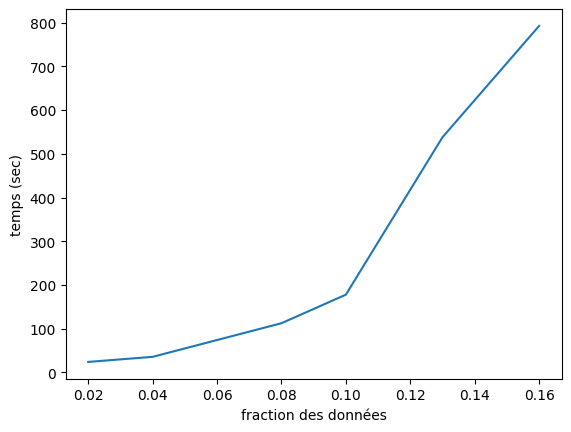

In [11]:
import matplotlib.pyplot as plt

plt.plot([0.02,0.04,0.08,0.1,0.13,0.16],[24.02399778366089,35.65785837173462,112.5030312538147, 177.83198046684265,537.7974755764008,792.3653001785278])
plt.xlabel("fraction des données")
plt.ylabel("temps (sec)")
plt.show()

    n_points  Erreur Max-Min  Écart-Type  Moyenne Abs      RMSE
0          1        0.874826    0.330052     0.304834  0.364643
1          2        0.528332    0.068464     0.047402  0.086111
2          3        0.632090    0.156831     0.137816  0.184921
3          4        0.520936    0.112327     0.090576  0.130799
4          5        0.500470    0.095338     0.074861  0.111414
5          6        0.393439    0.049177     0.030779  0.057272
6          7        0.427821    0.084199     0.072573  0.099789
7          8        0.417837    0.081774     0.068746  0.095534
8          9        0.445679    0.074764     0.062878  0.087350
9         10        0.471830    0.066748     0.054712  0.076588
10        11        0.404558    0.058821     0.046971  0.067375
11        12        0.463613    0.057324     0.047128  0.065530
12        13        0.500815    0.052314     0.041242  0.059844
13        14        0.505852    0.049157     0.037507  0.056084
14        15        0.488536    0.051378

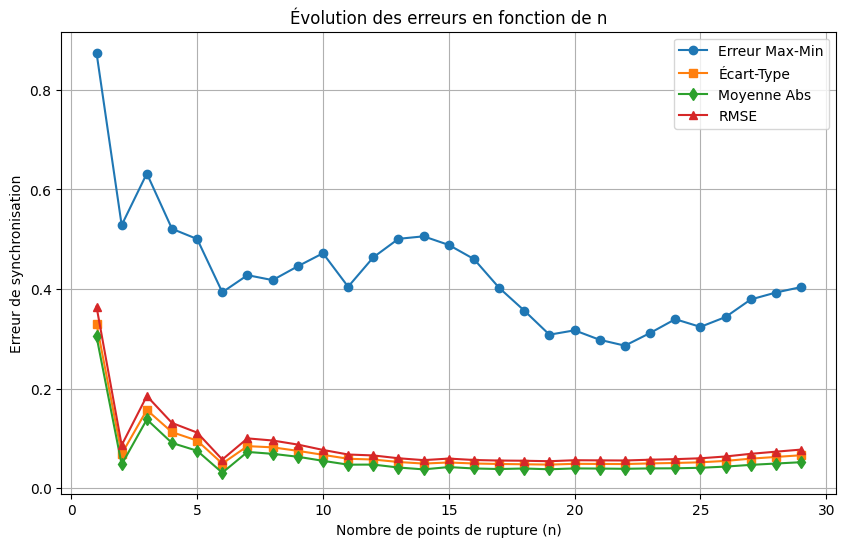

In [12]:
import matplotlib.pyplot as plt
df_results = pd.DataFrame({
    "n_points": list(range(1, 30)),
    "Erreur Max-Min": err,
    "Écart-Type": C,
    "Moyenne Abs": D,
    "RMSE": E
})

# Affichage du DataFrame
print(df_results)

# Tracé des courbes
plt.figure(figsize=(10, 6))
plt.plot(df_results["n_points"], df_results["Erreur Max-Min"], label="Erreur Max-Min", marker='o')
plt.plot(df_results["n_points"], df_results["Écart-Type"], label="Écart-Type", marker='s')
plt.plot(df_results["n_points"], df_results["Moyenne Abs"], label="Moyenne Abs", marker='d')
plt.plot(df_results["n_points"], df_results["RMSE"], label="RMSE", marker='^')

# Personnalisation du graphique
plt.xlabel("Nombre de points de rupture (n)")
plt.ylabel("Erreur de synchronisation")
plt.title("Évolution des erreurs en fonction de n")
plt.legend()
plt.grid(True)
plt.show()

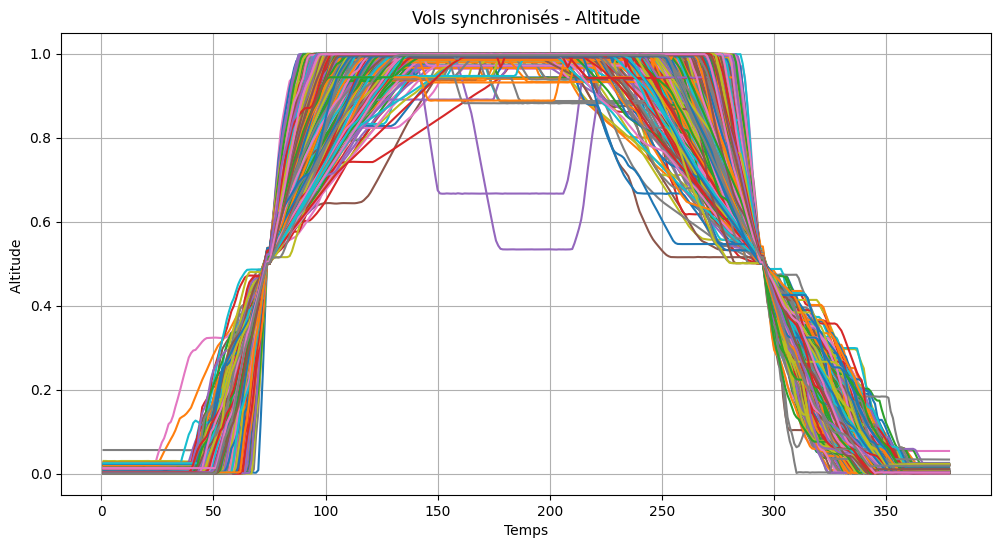

In [31]:
sync_flights, A, B = synchronize_flights(ds_cleaned,method="ptrivial",n_points=2,subset_fraction=0.05,col="ALT_norm")

ALT = sync_flights["ALT_norm"]

plt.figure(figsize=(12, 6))

for i, col in enumerate(ALT.columns):
    #print("Vol",i)
    plt.plot(np.arange(1, len(ALT) + 1), ALT[col])

plt.xlabel("Temps")
plt.ylabel("Altitude ")
plt.title("Vols synchronisés - Altitude")
plt.grid()
plt.show()

In [ ]:
sync_flights_triv, A, B = synchronize_flights(ds_cleaned,method="trivial",n_points=20,subset_fraction=0.05,col="ALT_norm")
print(np.mean(sync_flights_triv['ALT_norm'].max(axis=1)-sync_flights_triv['ALT_norm'].min(axis=1)))
print(np.mean(sync_flights_triv['ALT_norm'].std(axis=1)))
print(np.mean(np.abs(sync_flights_triv['ALT_norm'].sub(sync_flights_triv['ALT_norm'].mean(axis=1), axis=0))))
print(np.sqrt(np.mean((sync_flights_triv['ALT_norm'].sub(sync_flights_triv['ALT_norm'].mean(axis=1), axis=0))**2)))

sync_flights_triv, A, B = synchronize_flights(ds_cleaned,method="ptrivial",n_points=20,subset_fraction=0.05,col="ALT_norm")
print(np.mean(sync_flights_triv['ALT_norm'].max(axis=1)-sync_flights_triv['ALT_norm'].min(axis=1)))
print(np.mean(sync_flights_triv['ALT_norm'].std(axis=1)))
print(np.mean(np.abs(sync_flights_triv['ALT_norm'].sub(sync_flights_triv['ALT_norm'].mean(axis=1), axis=0))))
print(np.sqrt(np.mean((sync_flights_triv['ALT_norm'].sub(sync_flights_triv['ALT_norm'].mean(axis=1), axis=0))**2)))

0.8274415258759263
0.15272173325471802
0.11213293423199824
0.18433143240341324
0.3030456854516017
0.036788251206946204
0.02572731717471931
0.04726187703723553
0.3183346574759061
0.0486869254600599
0.03942680872175012
0.05591696123034714


In [ ]:
sync_flights_triv, A, B = synchronize_flights(ds_cleaned,method="ruptures",n_points=100,subset_fraction=0.5,col="ALT_norm")
print(np.mean(sync_flights_triv['ALT_norm'].max(axis=1)-sync_flights_triv['ALT_norm'].min(axis=1)))
print(np.mean(sync_flights_triv['ALT_norm'].std(axis=1)))
print(np.mean(np.abs(sync_flights_triv['ALT_norm'].sub(sync_flights_triv['ALT_norm'].mean(axis=1), axis=0))))
print(np.sqrt(np.mean((sync_flights_triv['ALT_norm'].sub(sync_flights_triv['ALT_norm'].mean(axis=1), axis=0))**2)))

In [2]:
sync_flights, A, B = synchronize_flights(ds_cleaned,method="trivial",n_points=n,subset_fraction=0.05,col="ALT_norm")

ALT = sync_flights_triv["ALT_norm"]

plt.figure(figsize=(12, 6))

for i, col in enumerate(ALT.columns):
    #print("Vol",i)
    plt.plot(np.arange(1, len(ALT) + 1), ALT[col])

plt.xlabel("Temps")
plt.ylabel("Altitude [m]")
plt.title("Vols synchronisés - Altitude")
plt.grid()
plt.show()

NameError: name 'synchronize_flights' is not defined

In [ ]:
sync_flights["ALT"]["re"]

In [ ]:
def reconstruct_flight(aligned_dfs, original_flight, change_points,flight):
    """
    Reconstruit un vol original à partir des données alignées tout en respectant les phases.

    Arguments :
        aligned_dfs : dict of pd.DataFrame - Dictionnaire contenant les données synchronisées.
        original_flight : pd.DataFrame - Données originales du vol (avant synchronisation).
        change_points : list - Points de changement de phase du vol original.

    Returns :
        reconstructed_df : pd.DataFrame - Vol reconstruit avec toutes les variables.
    """
    reconstructed_df = original_flight.copy()
    
    for col in original_flight.columns:  # Boucle sur chaque variable
        col_clean = re.sub(r'\[.*\]', '', col)  # Nettoyage du nom de la colonne
        if col_clean in aligned_dfs:  # Vérifie si la variable est présente dans les données synchronisées
            aligned_series = aligned_dfs[col_clean].iloc[:, flight]  # Sélectionne le vol correspondant dans sync_flights
            reconstructed_df[col] = np.nan  

            # Reconstruction phase par phase
            for i in range(len(change_points) - 1):
                t0, t1 = change_points[i], change_points[i + 1]

                if t1 > len(reconstructed_df) - 1:  
                    t1 = len(reconstructed_df) - 1

                if i >= len(aligned_series):
                    continue

                phase_start = int(i * (len(aligned_series) / (len(change_points) - 1)))
                phase_end = int((i + 1) * (len(aligned_series) / (len(change_points) - 1)))

                aligned_phase = aligned_series.iloc[phase_start:phase_end]

                if len(aligned_phase) < 2:
                    continue

                new_t = np.linspace(t0, t1, len(aligned_phase))
                reconstructed_df[col].iloc[t0:t1] = np.interp(
                    np.arange(t0, t1),
                    new_t,
                    aligned_phase.values
                )

    return reconstructed_df
reconstructed_flight = reconstruct_flight(sync_flights, ds_cleaned[0], A[0],0)
